## English to Roman Nepali Translation

In [1]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

In [2]:
data_path = "./data/eng_roman.csv"

data = pd.read_csv(data_path)

In [3]:
data.head(10)

,English,Roman Nepali
0,Hello,Namaste
1,How are you?,Timi kasto chau?
2,Good morning,Subha bihani
3,Thank you,Dhanyabad
4,Where are you?,Timi kahaan chau?
5,What is your name?,Timi ko naam ke ho?
6,I am fine,Ma thik chu
7,See you later,Pachi bhetaula
8,I am hungry,Ma bhok lagyo
9,Can you help me?,Ke timi malai sahayog garna sakchau?


In [4]:
data["Roman Nepali"] = data["Roman Nepali"].apply(lambda x: f"<start> {x} <end>") # applying start and end token to target data

In [5]:
data["Roman Nepali"]

0                                 <start> Namaste <end>
1                        <start> Timi kasto chau? <end>
2                            <start> Subha bihani <end>
3                               <start> Dhanyabad <end>
4                       <start> Timi kahaan chau? <end>
5                     <start> Timi ko naam ke ho? <end>
6                             <start> Ma thik chu <end>
7                          <start> Pachi bhetaula <end>
8                           <start> Ma bhok lagyo <end>
9     <start> Ke timi malai sahayog garna sakchau? <...
10                            <start> Subha ratri <end>
11                            <start> Kati bajyo? <end>
12                 <start> Ma timilai maya garchu <end>
13                   <start> Ma thakai lageko chu <end>
14                     <start> Kripaya yaha aaunu <end>
15                    <start> Charpi kahaan chha? <end>
16                <start> Pachi malai call garera <end>
17                 <start> Ma timilai miss garch

In [6]:
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

In [7]:
eng_tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')
nep_tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n')

In [8]:
eng_tokenizer.fit_on_texts(train_data["English"])
nep_tokenizer.fit_on_texts(train_data["Roman Nepali"])

In [9]:
index2word_nep = nep_tokenizer.index_word

In [10]:
eng_sequences = eng_tokenizer.texts_to_sequences(train_data["English"])
nep_sequences = nep_tokenizer.texts_to_sequences(train_data["Roman Nepali"])

In [11]:
nep_sequences[:10]

[[1, 3, 26, 27, 28, 2],
 [1, 15, 29, 30, 2],
 [1, 31, 2],
 [1, 3, 32, 16, 2],
 [1, 3, 33, 34, 5, 2],
 [1, 3, 35, 36, 2],
 [1, 13, 17, 8, 2],
 [1, 3, 18, 5, 2],
 [1, 3, 37, 2],
 [1, 4, 9, 14, 2]]

In [12]:
eng_sequences[:10]

[[1, 23, 2],
 [14, 15, 24],
 [25, 2],
 [1, 3, 26],
 [1, 3, 27],
 [1, 3, 28],
 [29, 30, 31, 16],
 [1, 3, 32],
 [1, 3, 33],
 [6, 8, 2]]

In [13]:
word2idx_eng = eng_tokenizer.word_index

In [14]:
word2idx_eng["i"]

1

In [15]:
word2idx_nep = nep_tokenizer.word_index

In [16]:
nep_sequences

[[1, 3, 26, 27, 28, 2],
 [1, 15, 29, 30, 2],
 [1, 31, 2],
 [1, 3, 32, 16, 2],
 [1, 3, 33, 34, 5, 2],
 [1, 3, 35, 36, 2],
 [1, 13, 17, 8, 2],
 [1, 3, 18, 5, 2],
 [1, 3, 37, 2],
 [1, 4, 9, 14, 2],
 [1, 6, 7, 8, 2],
 [1, 4, 38, 39, 2],
 [1, 6, 19, 40, 10, 2],
 [1, 41, 42, 2],
 [1, 3, 43, 5, 2],
 [1, 44, 9, 10, 2],
 [1, 7, 4, 11, 45, 46, 47, 2],
 [1, 20, 11, 48, 49, 2],
 [1, 50, 21, 2],
 [1, 4, 9, 51, 2],
 [1, 11, 52, 53, 2],
 [1, 22, 54, 2],
 [1, 55, 2],
 [1, 7, 4, 6, 23, 56, 2],
 [1, 57, 58, 2],
 [1, 3, 23, 59, 2],
 [1, 3, 60, 61, 2],
 [1, 24, 2],
 [1, 3, 62, 63, 64, 2],
 [1, 4, 25, 14, 2],
 [1, 4, 12, 17, 25, 65, 2],
 [1, 13, 66, 2],
 [1, 67, 19, 68, 10, 2],
 [1, 7, 4, 69, 70, 2],
 [1, 6, 22, 8, 2],
 [1, 3, 71, 5, 2],
 [1, 7, 3, 6, 72, 73, 74, 2],
 [1, 13, 75, 2],
 [1, 76, 77, 16, 2],
 [1, 15, 78, 79, 2],
 [1, 80, 12, 81, 9, 10, 2],
 [1, 4, 18, 14, 2],
 [1, 20, 21, 2],
 [1, 4, 12, 82, 83, 84, 8, 2],
 [1, 85, 86, 87, 2],
 [1, 88, 12, 24, 2],
 [1, 3, 89, 5, 2],
 [1, 11, 90, 91, 2]]

In [17]:
len(word2idx_nep), len(word2idx_eng)

(91, 81)

In [18]:
max_eng_len = max([len(seq) for seq in eng_sequences])
max_nep_len = max([len(x) for x in nep_sequences])

max_eng_len, max_nep_len

(5, 8)

In [19]:
eng_vocab_size = len(word2idx_eng) + 1
nep_vocab_size = len(word2idx_nep) + 1

In [20]:
# padding the sequences
eng_sequences = pad_sequences(eng_sequences, maxlen=max_eng_len, padding="post")

In [21]:
eng_sequences[:10]

array([[ 1, 23,  2,  0,  0],
       [14, 15, 24,  0,  0],
       [25,  2,  0,  0,  0],
       [ 1,  3, 26,  0,  0],
       [ 1,  3, 27,  0,  0],
       [ 1,  3, 28,  0,  0],
       [29, 30, 31, 16,  0],
       [ 1,  3, 32,  0,  0],
       [ 1,  3, 33,  0,  0],
       [ 6,  8,  2,  0,  0]])

In [22]:
nep_sequences = pad_sequences(nep_sequences, maxlen=max_nep_len, padding="post")

nep_sequences[:10]

array([[ 1,  3, 26, 27, 28,  2,  0,  0],
       [ 1, 15, 29, 30,  2,  0,  0,  0],
       [ 1, 31,  2,  0,  0,  0,  0,  0],
       [ 1,  3, 32, 16,  2,  0,  0,  0],
       [ 1,  3, 33, 34,  5,  2,  0,  0],
       [ 1,  3, 35, 36,  2,  0,  0,  0],
       [ 1, 13, 17,  8,  2,  0,  0,  0],
       [ 1,  3, 18,  5,  2,  0,  0,  0],
       [ 1,  3, 37,  2,  0,  0,  0,  0],
       [ 1,  4,  9, 14,  2,  0,  0,  0]])

In [23]:
nep_sequences[1], data["Roman Nepali"].iloc[1]

(array([ 1, 15, 29, 30,  2,  0,  0,  0]), '<start> Timi kasto chau? <end>')

In [24]:
encoder_input = eng_sequences
# decoder input and output
decoder_input = np.array([seq[:-1] for seq in nep_sequences])
decoder_output = np.array([seq[1:] for seq in nep_sequences])

In [25]:
decoder_input[0], decoder_output[0]

(array([ 1,  3, 26, 27, 28,  2,  0]), array([ 3, 26, 27, 28,  2,  0,  0]))

In [26]:
decoder_input[:10], decoder_output[:10]

(array([[ 1,  3, 26, 27, 28,  2,  0],
        [ 1, 15, 29, 30,  2,  0,  0],
        [ 1, 31,  2,  0,  0,  0,  0],
        [ 1,  3, 32, 16,  2,  0,  0],
        [ 1,  3, 33, 34,  5,  2,  0],
        [ 1,  3, 35, 36,  2,  0,  0],
        [ 1, 13, 17,  8,  2,  0,  0],
        [ 1,  3, 18,  5,  2,  0,  0],
        [ 1,  3, 37,  2,  0,  0,  0],
        [ 1,  4,  9, 14,  2,  0,  0]]),
 array([[ 3, 26, 27, 28,  2,  0,  0],
        [15, 29, 30,  2,  0,  0,  0],
        [31,  2,  0,  0,  0,  0,  0],
        [ 3, 32, 16,  2,  0,  0,  0],
        [ 3, 33, 34,  5,  2,  0,  0],
        [ 3, 35, 36,  2,  0,  0,  0],
        [13, 17,  8,  2,  0,  0,  0],
        [ 3, 18,  5,  2,  0,  0,  0],
        [ 3, 37,  2,  0,  0,  0,  0],
        [ 4,  9, 14,  2,  0,  0,  0]]))

In [27]:
latent_dim = 256

In [28]:
encoder_inputs = Input(shape=(max_eng_len, ))
encoder_embedding = Embedding(eng_vocab_size, latent_dim)(encoder_inputs)
encoder_lstm, state_h, state_c = LSTM(latent_dim, return_state=True)(encoder_embedding)
encoder_states = [state_h, state_c]

In [29]:
decoder_inputs = Input(shape=(max_nep_len - 1, ))
decoder_embedding = Embedding(nep_vocab_size,latent_dim)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(nep_vocab_size, activation="softmax")
decoder_outputs = decoder_dense(decoder_outputs)


In [30]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [31]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 5, 256)    │     20,992 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 7, 256)    │     23,552 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 256),     │    525,312 │ embedding[0][0]   │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 7, 256),  │    525,312 │ embedding_1[0][0… │
│                     │ (None, 256),      │            │ lstm[0][1],       │
│                     │ (None, 256)]      │            │ lstm[0][2]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 7, 92)     │     23,644 │ lstm_1[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,118,812 (4.27 MB)

 Trainable params: 1,118,812 (4.27 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [33]:
model_history = model.fit(
    [encoder_input, decoder_input],
    decoder_output,
    batch_size=16,
    epochs=300,
    verbose=0
)

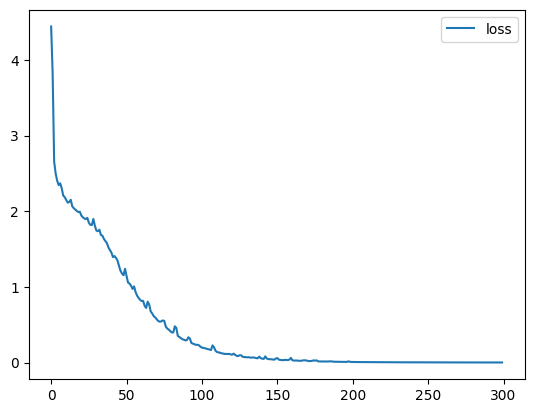

In [34]:
import matplotlib.pyplot as plt

plt.plot(model_history.history["loss"], label="loss")
plt.legend()

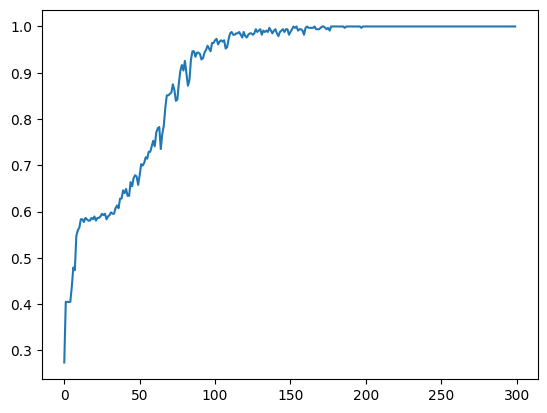

In [35]:
plt.plot(model_history.history["accuracy"], label="accuracy")

In [36]:
eng_text = "I am a student"

start_token = nep_tokenizer.word_index["<start>"]
end_token = nep_tokenizer.word_index["<end>"]

In [37]:
def translate_sentence(input_text):
    input_sequence = eng_tokenizer.texts_to_sequences([input_text])
    input_sequence_padded = pad_sequences(input_sequence, maxlen=max_eng_len, padding="post")

    # creating an empty decoder input with just the start token
    decoder_input_sequence = np.zeros((1, max_nep_len - 1))
    decoder_input_sequence[0, 0] = start_token

    translated_sentence = []
    for i in range(max_nep_len - 1):
        predicted_sequence_logits = model.predict([input_sequence_padded, decoder_input_sequence])
        predicted_token = np.argmax(predicted_sequence_logits[0, i, :])
        if predicted_token == end_token:
            break
        translated_sentence.append(index2word_nep[predicted_token])
        decoder_input_sequence[0, i + 1] = predicted_token

    return ' '.join(translated_sentence)

# Example usage
input_text = "are you fine?"
translated_text = translate_sentence(input_text)
print(f"English: {input_text}")
print(f"Roman Nepali: {translated_text}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
English: are you fine?
Roman Nepali: timi thik chau


In [38]:
data["English"]

0                            Hello
1                     How are you?
2                     Good morning
3                        Thank you
4                   Where are you?
5               What is your name?
6                        I am fine
7                    See you later
8                      I am hungry
9                 Can you help me?
10                      Good night
11                What time is it?
12                      I love you
13                      I am tired
14                Please come here
15          Where is the bathroom?
16                   Call me later
17                      I miss you
18                       Let us go
19             What are you doing?
20                   Are you okay?
21               How was your day?
22                   It is raining
23                       I am busy
24              Do you understand?
25                    I need water
26                 Have a nice day
27                       Take care
28                  

In [39]:
translate_sentence("can you help me")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


'ke timi malai sahayog garna sakchau'

In [40]:
translate_sentence("I am sad")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


'ma dukhi chu'

In [41]:
translate_sentence("Let us play")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


'jau hai ta'

In [42]:
translate_sentence("Are you busy?")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'timi thik chau'

In [43]:
translate_sentence("I am happy")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'ma khushi chu'

In [44]:
translate_sentence("Who are you?")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


'timi thik chau'

In [45]:
translate_sentence("good morning")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'subha bihani'

In [46]:
translate_sentence("good night")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


'subha ratri'

In [47]:
translate_sentence("let us eat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


'jau khana khaum'

In [48]:
translate_sentence("I love you")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


'janmadin ko subhakamana'

In [55]:
translate_sentence("i am fine")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


'ma thik chu'